<a href="https://colab.research.google.com/github/202218031/DM_Project_2/blob/202218057_Anushka/202218057_DM_Course_Project_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [2]:
df=pd.read_csv("/content/smoking_driking_dataset_Ver01.csv")

In [3]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18974 entries, 0 to 18973
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sex               18974 non-null  object 
 1   age               18974 non-null  int64  
 2   height            18974 non-null  int64  
 3   weight            18974 non-null  int64  
 4   waistline         18974 non-null  float64
 5   sight_left        18973 non-null  float64
 6   sight_right       18973 non-null  float64
 7   hear_left         18973 non-null  float64
 8   hear_right        18973 non-null  float64
 9   SBP               18973 non-null  float64
 10  DBP               18973 non-null  float64
 11  BLDS              18973 non-null  float64
 12  tot_chole         18973 non-null  float64
 13  HDL_chole         18973 non-null  float64
 14  LDL_chole         18973 non-null  float64
 15  triglyceride      18973 non-null  float64
 16  hemoglobin        18973 non-null  float6

In [ ]:
df.shape

(1000835, 24)

In [14]:
df.dropna(inplace=True)

In [ ]:
df.shape

(1000834, 24)

In [15]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(991322, 24)

In [ ]:
df['sex'].value_counts()

Male      526400
Female    464922
Name: sex, dtype: int64

In [ ]:
df.replace({'sex': {'Male': 0, 'Female': 1}}, inplace = True)
df['sex'].value_counts()

0    526400
1    464922
Name: sex, dtype: int64

In [ ]:
df.replace({'DRK_YN':{'Y':1, 'N':0}}, inplace = True)
df['DRK_YN'].value_counts()

0    495845
1    495477
Name: DRK_YN, dtype: int64

In [5]:
df.groupby('DRK_YN').mean()

<ipython-input-5-1216d6f0a498>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('DRK_YN').mean()


,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
DRK_YN,,,,,,,,,,,,,,,,,,,,,
N,51.60141,158.792232,59.993159,80.139596,0.936586,0.928050,1.039049,1.038943,122.094832,75.169456,...,57.032839,114.613304,122.372382,13.756426,1.098305,0.830997,24.950321,23.98958,26.799284,1.329544
Y,43.62595,165.779139,66.642209,82.410346,1.023891,1.023976,1.020059,1.019954,123.086993,77.117504,...,57.423670,111.566090,143.652660,14.723079,1.095228,0.889960,26.819257,27.39337,47.302893,1.902027


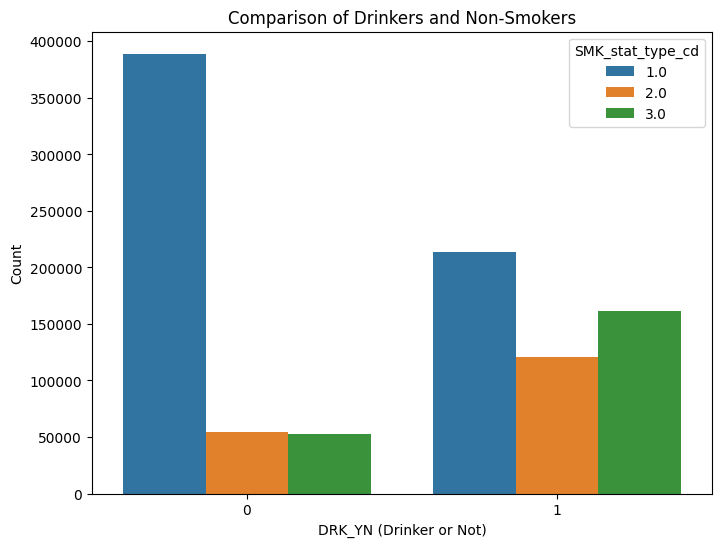

                            count       mean        std   min   25%   50%  \
DRK_YN SMK_stat_type_cd                                                     
0      1.0               389001.0  51.997064  14.453316  20.0  40.0  50.0   
       2.0                54471.0  54.302106  13.470960  20.0  45.0  55.0   
       3.0                52373.0  46.303057  13.403406  20.0  35.0  45.0   
1      1.0               213431.0  42.000295  13.249805  20.0  30.0  40.0   
       2.0               120474.0  48.218869  12.317751  20.0  40.0  50.0   
       3.0               161572.0  42.199360  11.550374  20.0  35.0  40.0   

                          75%   max  
DRK_YN SMK_stat_type_cd              
0      1.0               60.0  85.0  
       2.0               65.0  85.0  
       3.0               55.0  85.0  
1      1.0               50.0  85.0  
       2.0               55.0  85.0  
       3.0               50.0  85.0  


In [ ]:
# Countplot to compare the number of drinkers and non-drinkers
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='DRK_YN', hue='SMK_stat_type_cd')
plt.title('Comparison of Drinkers and Non-Smokers')
plt.xlabel('DRK_YN (Drinker or Not)')
plt.ylabel('Count')
plt.show()

# Summary statistics for drinkers and non-drinkers
summary = df.groupby(['DRK_YN', 'SMK_stat_type_cd'])['age'].describe()
print(summary)


In [ ]:
# Converting Obejcts into numerical data types
LabelEncoder = preprocessing.LabelEncoder()
df.sex= LabelEncoder.fit_transform(df["sex"])
df.DRK_YN = LabelEncoder.fit_transform(df["DRK_YN"])

In [ ]:
df["DRK_YN"].value_counts(), # Drinkers
df["SMK_stat_type_cd"].value_counts() #smokers

1.0    602432
3.0    213945
2.0    174945
Name: SMK_stat_type_cd, dtype: int64

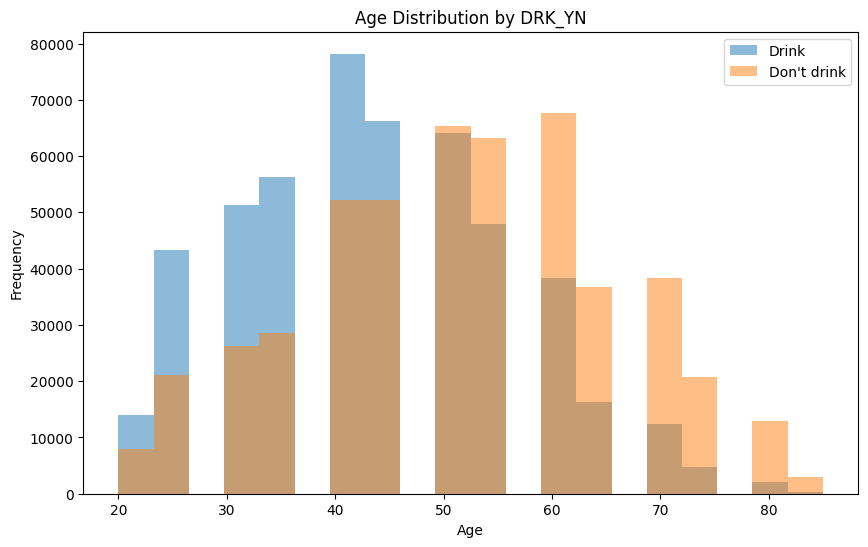

In [ ]:
# Filter data based on DRK_YN values
drk_1 = df[df['DRK_YN'] == 1]
drk_2 = df[df['DRK_YN'] == 0]


# Plotting
plt.figure(figsize=(10, 6))
plt.hist(drk_1['age'], bins=20, alpha=0.5, label='Drink')
plt.hist(drk_2['age'], bins=20, alpha=0.5, label="Don't drink")

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by DRK_YN')
plt.legend()
plt.show()

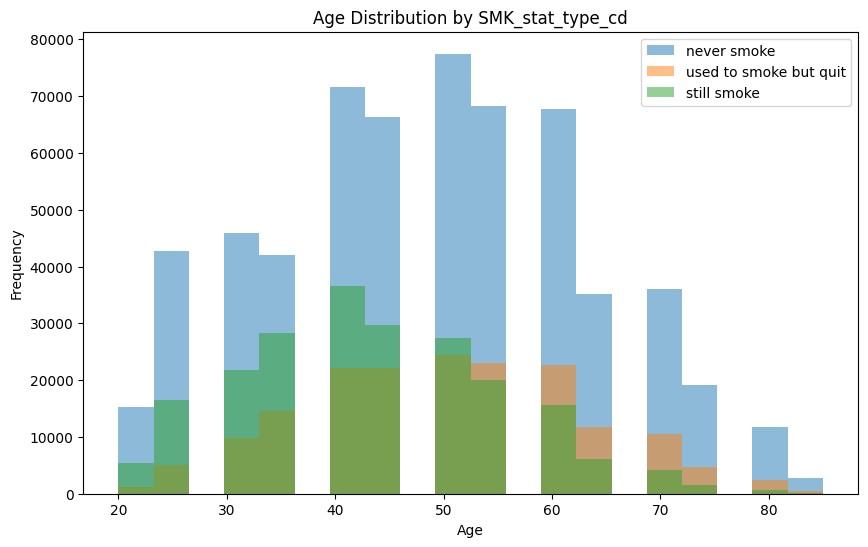

In [ ]:
# Filter data based on SMK values
smk_1 = df[df['SMK_stat_type_cd'] == 1]
smk_2 = df[df['SMK_stat_type_cd'] == 2]
smk_3 = df[df['SMK_stat_type_cd'] == 3]

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(smk_1['age'],bins=20, alpha=0.5, label='never smoke')
plt.hist(smk_2['age'],bins=20, alpha=0.5,label='used to smoke but quit')
plt.hist(smk_3['age'],bins=20, alpha=0.5,label='still smoke')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by SMK_stat_type_cd')
plt.legend()
plt.show()

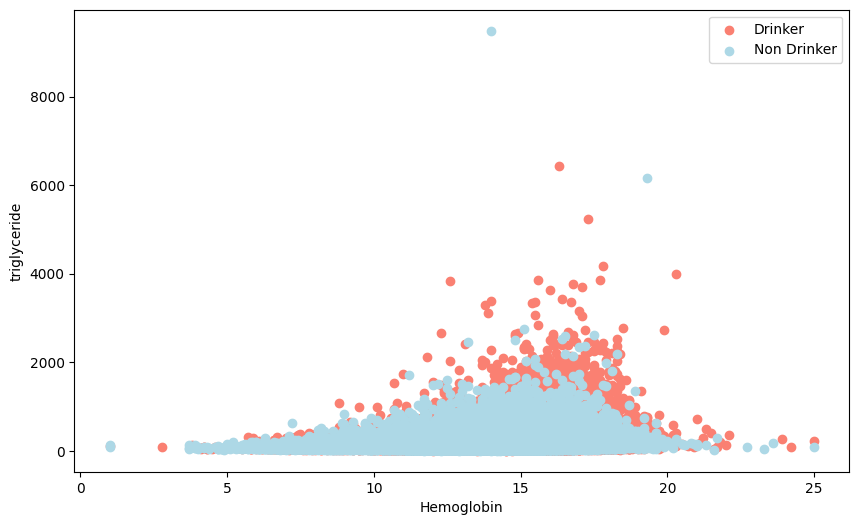

In [ ]:
#Heamoglovin vs triglyceride
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.hemoglobin[df.DRK_YN==1],
            df.triglyceride[df.DRK_YN==1],
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.hemoglobin[df.DRK_YN==0],
            df.triglyceride[df.DRK_YN==0],
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.xlabel("Hemoglobin")
plt.legend(["Drinker", "Non Drinker"])
plt.ylabel("triglyceride");

<ipython-input-6-e7df4d4287d3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


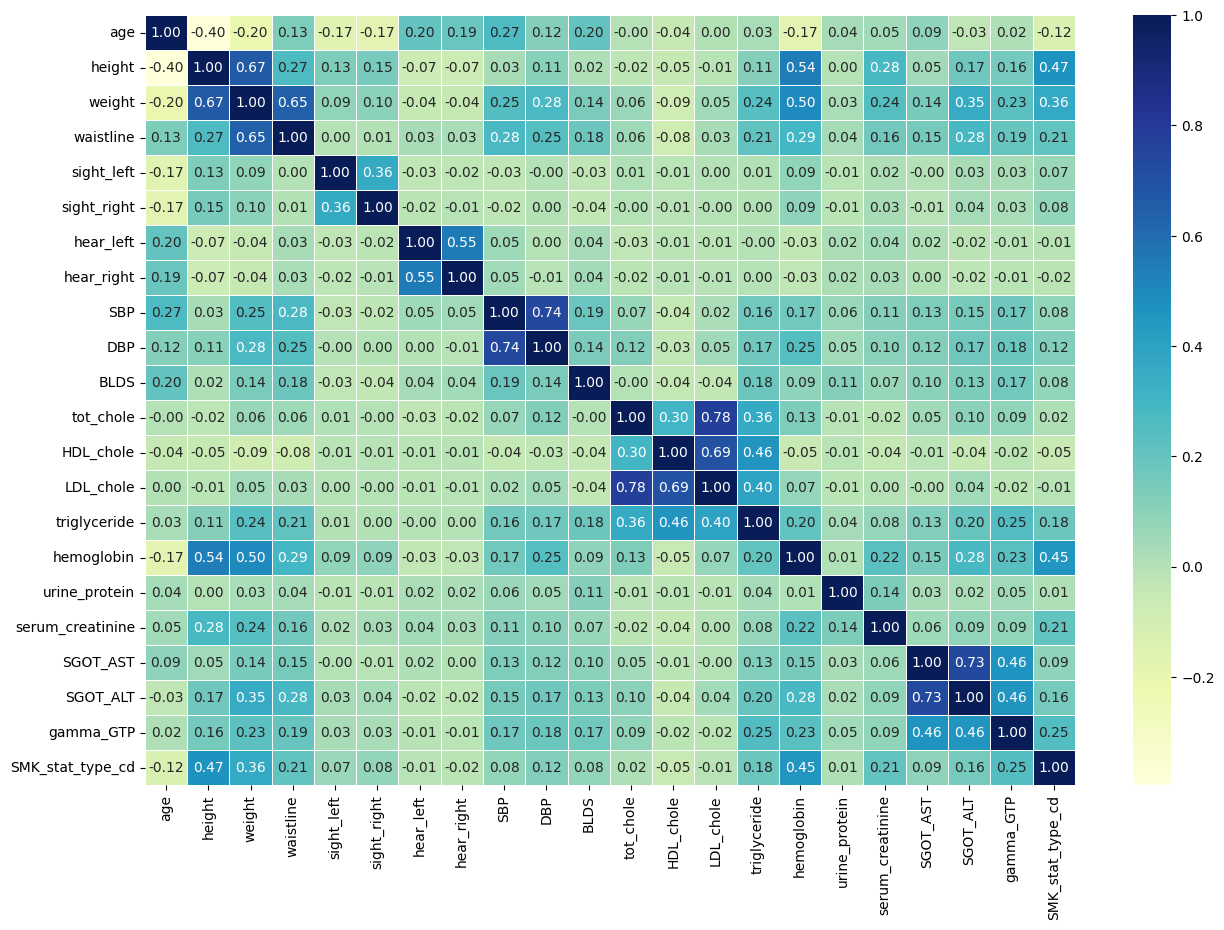

In [6]:
corr_matrix=df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="YlGnBu")

##Correlated features related to drinking

In [ ]:
correlation_threshold = 0.1
DRK_features = []
for feature in corr_matrix.columns:
    if feature != 'DRK_YN' and (corr_matrix[feature]['DRK_YN'] > correlation_threshold or
                                corr_matrix[feature]['DRK_YN'] < -correlation_threshold):
        DRK_features.append(feature)

print("Correlated features with 'DRK_YN':")
print(DRK_features)

Correlated features with 'DRK_YN':
['sex', 'age', 'height', 'weight', 'DBP', 'triglyceride', 'hemoglobin', 'gamma_GTP', 'SMK_stat_type_cd']


##Correlated features related to smoking

In [7]:
correlation_threshold = 0.1
SMK_features = []
for feature in corr_matrix.columns:
    if feature != 'SMK_stat_type_cd' and (corr_matrix[feature]['SMK_stat_type_cd'] > correlation_threshold or
                                corr_matrix[feature]['SMK_stat_type_cd'] < -correlation_threshold):
        SMK_features.append(feature)

print("Correlated features with SMK_stat_type_cd:")
print(SMK_features)

Correlated features with SMK_stat_type_cd:
['age', 'height', 'weight', 'waistline', 'DBP', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_ALT', 'gamma_GTP']


In [ ]:
x=df[DRK_features]
y=df["DRK_YN"]

##**Training models for drinkers**

##Logistic regression and support vector classifier

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_test.shape,y_train.shape
lgr_model = LogisticRegression(max_iter=1000, fit_intercept=False)  # Set fit_intercept=False
lgr_model.fit(x_train, y_train)

svc_model = svm.LinearSVC(max_iter=1000)
svc_model.fit(x_train, y_train)

y_pred_lgr = lgr_model.predict(x_test)
y_pred_svc = svc_model.predict(x_test)

accuracy_lgr = accuracy_score(y_test, y_pred_lgr)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print("Logistic Regression Accuracy:", accuracy_lgr)
print("SVM Accuracy:", accuracy_svc)

Logistic Regression Accuracy: 0.7138526719289839
SVM Accuracy: 0.6787077900789348


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
print(precision_score(y_test, y_pred_lgr))
print(f1_score(y_test, y_pred_lgr))
print(recall_score(y_test, y_pred_lgr))

0.7182472109559636
0.7104351154778614
0.702791129781476


##Random forset classifier

In [ ]:
model3=RandomForestClassifier()
model3.fit(x_train,y_train)
y_pred=model3.predict(x_test)
score1=accuracy_score(y_test,y_pred)
print("Accuracy for Random forest:",score1)

Accuracy for Random forest: 0.7107558066224497


##Feature importance used by model

In [ ]:
feature_importances = model3.feature_importances_
importance_dict = dict(zip(x_train.columns, feature_importances))
importance_dict = dict(sorted(importance_dict.items(), key=lambda item: item[1], reverse=True))
for feature, importance in importance_dict.items():
    print(f"{feature}: {importance}")


triglyceride: 0.19302669473142436
hemoglobin: 0.16137110516012082
gamma_GTP: 0.14335659195822795
DBP: 0.13637834256852993
age: 0.09216737698360726
weight: 0.0737927806825443
height: 0.07331463302303223
SMK_stat_type_cd: 0.06658870045865092
sex: 0.06000377443386226


**Hyper Parameter tuning (Using Grid search CV)**

In [ ]:
# Grid Search CV on SVC and Logistic Regression
log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":["liblinear"]}

#Logictic Regression
lreg_gs=GridSearchCV(LogisticRegression(),
                     log_reg_grid,
                      cv=5,
                    verbose=True)
lreg_gs.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
lreg_gs.best_params_

{'C': 10000.0, 'solver': 'liblinear'}

A smaller C value suggests stronger regularization, which may help prevent overfitting.

The 'liblinear' solver is a good choice for small datasets and is well-suited for problems with binary classification.

In [ ]:
p=lreg_gs.predict(x_test)
print(accuracy_score(y_test,p))
print(precision_score(y_test,p))

0.7137265780647114
0.7190518635214129


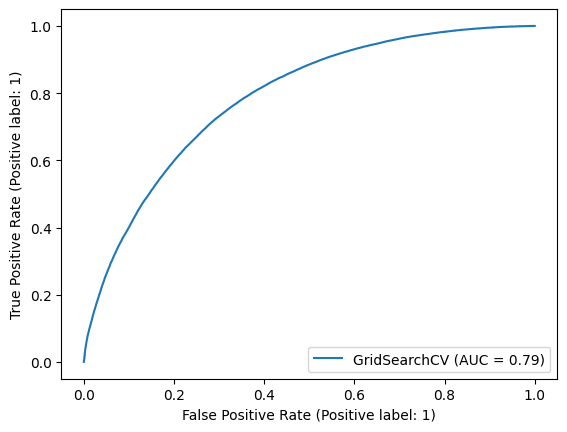

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(lreg_gs, x_test, y_test)

##**Training models for smokers**

In [8]:
x=df[SMK_features]
y=df["SMK_stat_type_cd"]
#split into test and train
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_test.shape,y_train.shape

((15179, 10), (3795, 10), (3795,), (15179,))

#Random forest classifier

In [ ]:
model3=RandomForestClassifier()
model3.fit(x_train,y_train)
y_pred=model3.predict(x_test)
score1=accuracy_score(y_test,y_pred)
score1

0.6986306206339999

##Hyperparameter Tuning

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [16]:
# Grid Search CV on RandomForest
param_grid = {
    'n_estimators': [100, 200],                # Number of trees in the forest
    'max_depth': [None, 10],                   # Maximum depth of the tree
    'min_samples_split': [2, 5],               # Minimum number of samples required to split an internal node
}


#Logictic Regression
lreg_gs=GridSearchCV(RandomForestClassifier(),
                     param_grid,
                     n_jobs=-1,
                      cv=2,
                    verbose=True)
lreg_gs.fit(x_train,y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10], 'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             verbose=True)

In [11]:
best_params = lreg_gs.best_params_
best_score = lreg_gs.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.6810726241833622
